In [1]:
import Ativo as at
import FileManager as fman
import pickle
import pandas as pd
import numpy as np
import datetime
from matplotlib import pyplot as plt
import TradesAnalyser as ta
import seaborn as sns

pd.set_option('display.max_rows', 167) # opcional, questão de visualização para debugar caso 1

In [2]:
fm = fman.FileManager()

In [3]:
with open('AtivoDiaList.pkl', 'rb') as filehandle: # w de write e b de binary
    ativo_dia_list = pickle.load(filehandle) # notar como para salvar precisamos passar a list e o filehandle, mas pra abrir não

In [4]:
an = ta.TradesAnalyser(ativo_dia_list)

In [5]:
#an.setFilterParameters(gap_threshold=0.1, F_high_threshold=9)
#an.setFilterParameters(prevol_threshold=15000000)
an.runFiltering()

In [6]:
#an.setSimParameters(start_money = 10000,allocation=0.1)
#an.setAlgoParameters(short_after=0, exit_target=0.4, exit_stop=0.4)
#an.setAlgoParameters(short_after=0.2)
#an.runSimulation()
# an.saveTrades('case1_trades.pkl')

an.openTrades('case1_trades.pkl')

In [7]:
#an.saveTrades('case4_trades.pkl')

In [8]:
dfd = an.getFilteredDays() # DataFrame of filtered ativo-dias
dft = an.getTrades() # DataFrame of trades

##### Análise de algumas estratificações

In [9]:
# CALCULA DATAFRAME DE TRADE RESULTS, QUE VAI PEGAR ELEMENTOS QUE INTERESSAM DA INNER JOIN ENTRE dfd e dft
dftr = pd.merge(dft,dfd,how='inner',on=['name','date'])
dftr = dftr[['name','date','gap','factorF','profit','cum_profit']]
dftr

,name,date,gap,factorF,profit,cum_profit
0,XNET,2019-10-28,0.259833,0.272726,0.150676,1.015068
1,ARAV,2019-11-20,1.011958,5.330140,0.300000,1.045520
2,CGIX,2019-11-20,1.755981,2.848012,0.242424,1.070866
3,VIVE,2019-11-22,0.369431,0.245800,0.300000,1.102992
4,ASLN,2019-12-02,0.753927,0.316165,0.300000,1.136081
5,AMRX,2019-12-12,0.343840,0.197234,0.023066,1.138702
6,RAD,2019-12-19,0.316168,0.320711,0.023079,1.141330
7,SVRA,2019-12-30,1.381503,0.568140,-0.081200,1.132062
8,CEI,2020-01-08,0.219632,0.116097,0.300000,1.166024
9,AGTC,2020-01-09,0.594724,0.907599,-0.267259,1.134861


In [10]:
# https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/
bins = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2]
gap = np.clip( dftr['gap'], bins[0], bins[-1] )
dftr.groupby(pd.cut(gap, bins)).agg(
    winrate=pd.NamedAgg(column='profit',aggfunc=lambda x: sum(x>=0)/(sum(x>=0) + sum(x<0)) ),
    lossrate=pd.NamedAgg(column='profit',aggfunc=lambda x: sum(x<0)/(sum(x>=0) + sum(x<0)) ),
    mean=pd.NamedAgg(column='profit',aggfunc=lambda x: x.mean()),
    mean_of_pos=pd.NamedAgg(column='profit',aggfunc=lambda x: x[x>=0].mean()),
    mean_of_neg=pd.NamedAgg(column='profit',aggfunc=lambda x: x[x<0].mean()),
    count=pd.NamedAgg(column='profit',aggfunc='count'),
    positives=pd.NamedAgg(column='profit',aggfunc=lambda x: sum(x>=0) ),
    negatives=pd.NamedAgg(column='profit',aggfunc=lambda x: sum(x<0) )
)

,winrate,lossrate,mean,mean_of_pos,mean_of_neg,count,positives,negatives
gap,,,,,,,,
"(0.2, 0.3]",0.656250,0.343750,0.059893,0.167241,-0.145045,32,21.0,11.0
"(0.3, 0.4]",0.833333,0.166667,0.101670,0.182004,-0.300000,12,10.0,2.0
"(0.4, 0.5]",0.578947,0.421053,0.044601,0.223321,-0.201138,19,11.0,8.0
"(0.5, 0.6]",0.750000,0.250000,0.061273,0.179514,-0.293452,20,15.0,5.0
"(0.6, 0.7]",0.750000,0.250000,0.106792,0.226048,-0.250974,16,12.0,4.0
"(0.7, 0.8]",0.571429,0.428571,0.078961,0.247418,-0.145648,7,4.0,3.0
"(0.8, 0.9]",0.800000,0.200000,0.111320,0.214151,-0.300000,10,8.0,2.0
"(0.9, 1.0]",1.000000,0.000000,0.208696,0.208696,NaN,2,2.0,0.0
"(1.0, 1.1]",0.750000,0.250000,0.139446,0.285928,-0.300000,8,6.0,2.0


In [11]:
dftr.groupby(dftr['date'].dt.to_period('M')).agg(
    winrate=pd.NamedAgg(column='profit',aggfunc=lambda x: sum(x>=0)/(sum(x>=0) + sum(x<0)) ),
    lossrate=pd.NamedAgg(column='profit',aggfunc=lambda x: sum(x<0)/(sum(x>=0) + sum(x<0)) ),
    mean=pd.NamedAgg(column='profit',aggfunc=lambda x: x.mean()),
    mean_of_pos=pd.NamedAgg(column='profit',aggfunc=lambda x: x[x>=0].mean()),
    mean_of_neg=pd.NamedAgg(column='profit',aggfunc=lambda x: x[x<0].mean()),
    count=pd.NamedAgg(column='profit',aggfunc='count'),
    positives=pd.NamedAgg(column='profit',aggfunc=lambda x: sum(x>=0) ),
    negatives=pd.NamedAgg(column='profit',aggfunc=lambda x: sum(x<0) )
)

,winrate,lossrate,mean,mean_of_pos,mean_of_neg,count,positives,negatives
date,,,,,,,,
2019-10,1.000000,0.000000,0.150676,0.150676,NaN,1,1.0,0.0
2019-11,1.000000,0.000000,0.280808,0.280808,NaN,3,3.0,0.0
2019-12,0.750000,0.250000,0.066236,0.115382,-0.081200,4,3.0,1.0
2020-01,0.700000,0.300000,0.115893,0.226117,-0.141296,10,7.0,3.0
2020-02,0.666667,0.333333,0.069506,0.221576,-0.234632,9,6.0,3.0
2020-03,0.523810,0.476190,-0.022623,0.189020,-0.255429,21,11.0,10.0
2020-04,0.642857,0.357143,0.062767,0.231816,-0.241520,14,9.0,5.0
2020-05,0.909091,0.090909,0.199595,0.249554,-0.300000,11,10.0,1.0
2020-06,0.718750,0.281250,0.084724,0.226720,-0.278153,32,23.0,9.0


In [12]:
an.printSimResults()

prevol_threshold 800000
open_dolar_threshold 2
gap_threshold 0.2
F_low_threshold 0
F_high_threshold 1

short_after 0.1
exit_target 0.3
exit_stop 0.3

start_money 10000
allocation 0.1
locate_fee 0.02
commission 2

Start Money: $10,000.00
End Money: $24,252.02
Max Drawdown: 0.12630384002450823
Number of Trades: 167
Number of filtered ativo-dias: 311


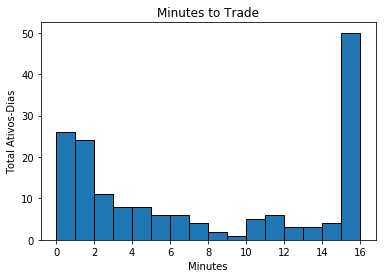

In [13]:
an.plotHistMinsToTrade()

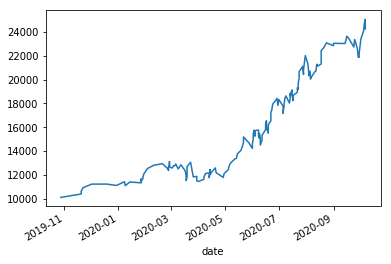

In [14]:
an.plotEquityCurve(logy=False)

In [15]:
an.getMaxDrawdown()

0.12630384002450823

In [16]:
an.getSimResults()

,prevol_threshold,open_dolar_threshold,gap_threshold,F_low_threshold,F_high_threshold,short_after,exit_target,exit_stop,start_money,allocation,locate_fee,commission,end_money,profit,max_drawdown,meanmax_drawdown,maxmax_drawdown,minmax_drawdown,n_trades,n_filtered_ativo_days
0,800000,2,0.2,0,1,0.1,0.3,0.3,10000,0.1,0.02,2,24252.022788,1.425202,0.126304,0.152931,0.271672,0.090297,167,311


In [17]:
an.runBootstrap(n_iter=50, replace=False)
an.printBootstrapResults()

base case maximum drawdown 0.12630384002450823
maximum maximum drawdown 0.2697748408341296
minimum maximum drawdown 0.07892234626822259
mean maximum drawdown 0.1505115772580135


##### Códigos para rodar combinações de parâmetros e otimizar.

In [ ]:
# oficial que gostaríamos de explorar
an.runSimulationGroup(
    prevol_threshold = [800000],
    exit_target=[0.1, 0.2, 0.3, 0.4], 
    exit_stop=[0.1, 0.2, 0.3, 0.4], 
    short_after=[0, 0.1, 0.2, 0.3],
    gap_threshold=[0, 0.1, 0.2],
    F_high_threshold = [1,2,3,4,5]
) # essa combinação daria 960. vamos rodando devagarinho

In [ ]:
# an.saveGroupResults('results_madrugada01.pkl')
an.openGroupResults('results_madrugada01.pkl')

In [19]:
# rodar para debugar
an.runSimulationGroup(
    prevol_threshold = [15000000],
    exit_target=[0.2], 
    exit_stop=[0.2, 0.3], 
    short_after=[0, 0.1],
    gap_threshold=[0, 0.1],
    F_high_threshold = [1]
)

Simulando 8 combinações de parâmetros.
running another simulation. 23/12/2020 19:15:16
running another simulation. 23/12/2020 19:15:31
running another simulation. 23/12/2020 19:15:45
running another simulation. 23/12/2020 19:16:00
running another simulation. 23/12/2020 19:16:16
running another simulation. 23/12/2020 19:16:30
running another simulation. 23/12/2020 19:16:45
running another simulation. 23/12/2020 19:17:00


##### Descrição simulações já rodadas

##### Testes temporários em geral

In [ ]:
an.getMaxDrawdown()